### Naive Bayes (Classifier)

#### Predicting Personal Loan Acceptance Based on Naive Bayes Classifier

The file **UniversalBank.csv** contains data on 5000 customers of Universal Bank. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

# load dataset 'UniversalBank.csv', using 'ID' as index column

data = pd.read_csv('UniversalBank.csv', index_col='ID')

In [2]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# define independent attributes 
features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account', 'CD Account', 'Online', 'CreditCard']

# assign values for independent variables and target variable ('Personal Loan')
X = data [features]
y = data ['Personal Loan']

In [4]:
# import train_test split
from sklearn.model_selection import train_test_split

# split train data into train and test, 60% in training and 40% in testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 0)

In [5]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB


#Create a Gaussian Naive Bayes Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
gnb = GaussianNB()

In [6]:
# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit
gnb.fit(X_train, y_train)

GaussianNB()

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 399 to 362
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 2000 non-null   int64  
 1   Experience          2000 non-null   int64  
 2   Income              2000 non-null   int64  
 3   Family              2000 non-null   int64  
 4   CCAvg               2000 non-null   float64
 5   Education           2000 non-null   int64  
 6   Mortgage            2000 non-null   int64  
 7   Securities Account  2000 non-null   int64  
 8   CD Account          2000 non-null   int64  
 9   Online              2000 non-null   int64  
 10  CreditCard          2000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 187.5 KB


In [9]:
# Do majority-class prediction (not accept: 0) -> Benchmark model
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html
pred_val_maj=np.zeros((2000,), dtype=int)

In [10]:
# test naive bayes model (output binary label)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict
pred_val = gnb.predict(X_test)
pred_val

array([0, 0, 0, ..., 0, 0, 1])

In [11]:
# import libararies for evaluation measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
# print the accurary rate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy of Benchmark Model:",accuracy_score(y_test, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:",accuracy_score(y_test, pred_val, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 0.904
Accuracy of Naive Bayes Model: 0.886


In [13]:
# print the confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix of Benchmark Model:", confusion_matrix(y_test, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", confusion_matrix(y_test, pred_val))

Confusion Matrix of Benchmark Model: [[1808    0]
 [ 192    0]]
Confusion Matrix of Naive Bayes Model: [[1660  148]
 [  80  112]]


In [14]:
# print the classification report with precision, recall
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("Classification Report of Benmark Model:",classification_report(y_test, pred_val_maj))
print("Classification Report of Naive Bayes Model:",classification_report(y_test, pred_val))

Classification Report of Benmark Model:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1808
           1       0.00      0.00      0.00       192

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.82      0.90      0.86      2000

Classification Report of Naive Bayes Model:               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1808
           1       0.43      0.58      0.50       192

    accuracy                           0.89      2000
   macro avg       0.69      0.75      0.72      2000
weighted avg       0.90      0.89      0.89      2000



/Users/joannek/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# test model (output probability estimate)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba
pred_prob = gnb.predict_proba(X_test)

# show the probability of belonging to class 0 and class 1
pred_prob

array([[9.99998214e-01, 1.78628096e-06],
       [9.99686292e-01, 3.13708008e-04],
       [9.94547427e-01, 5.45257336e-03],
       ...,
       [9.99959711e-01, 4.02894594e-05],
       [9.70935877e-01, 2.90641229e-02],
       [7.22698425e-02, 9.27730157e-01]])

In [16]:
# check the order of classes
gnb.classes_

array([0, 1])

In [17]:
# display the probability estimate for class 1

pred_prob[:,1]

array([1.78628096e-06, 3.13708008e-04, 5.45257336e-03, ...,
       4.02894594e-05, 2.90641229e-02, 9.27730157e-01])

In [18]:
# y_test is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1], pos_label=1)
#fpr, tpr, thresholds = roc_curve(y_test, pred_val2, pos_label=1)

In [19]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.53097345e-04,
       5.53097345e-04, 1.10619469e-03, 1.10619469e-03, 1.65929204e-03,
       1.65929204e-03, 2.21238938e-03, 2.21238938e-03, 3.31858407e-03,
       3.31858407e-03, 3.87168142e-03, 3.87168142e-03, 4.42477876e-03,
       4.42477876e-03, 4.97787611e-03, 4.97787611e-03, 5.53097345e-03,
       5.53097345e-03, 6.08407080e-03, 6.08407080e-03, 6.63716814e-03,
       6.63716814e-03, 7.74336283e-03, 7.74336283e-03, 8.29646018e-03,
       8.29646018e-03, 9.40265487e-03, 9.40265487e-03, 9.95575221e-03,
       9.95575221e-03, 1.10619469e-02, 1.10619469e-02, 1.16150442e-02,
       1.16150442e-02, 1.21681416e-02, 1.21681416e-02, 1.27212389e-02,
       1.27212389e-02, 1.32743363e-02, 1.32743363e-02, 1.38274336e-02,
       1.38274336e-02, 1.43805310e-02, 1.43805310e-02, 1.49336283e-02,
       1.49336283e-02, 1.54867257e-02, 1.54867257e-02, 2.21238938e-02,
       2.21238938e-02, 2.87610619e-02, 2.87610619e-02, 2.98672566e-02,
      

In [20]:
tpr

array([0.        , 0.00520833, 0.08333333, 0.08333333, 0.08854167,
       0.08854167, 0.13020833, 0.13020833, 0.15104167, 0.15104167,
       0.16666667, 0.16666667, 0.17708333, 0.17708333, 0.19270833,
       0.19270833, 0.20833333, 0.20833333, 0.21354167, 0.21354167,
       0.22395833, 0.22395833, 0.25520833, 0.25520833, 0.27083333,
       0.27083333, 0.27604167, 0.27604167, 0.28125   , 0.28125   ,
       0.28645833, 0.28645833, 0.30208333, 0.30208333, 0.3125    ,
       0.3125    , 0.31770833, 0.31770833, 0.33854167, 0.33854167,
       0.34375   , 0.34375   , 0.359375  , 0.359375  , 0.36458333,
       0.36458333, 0.375     , 0.375     , 0.38020833, 0.38020833,
       0.390625  , 0.390625  , 0.39583333, 0.39583333, 0.40625   ,
       0.40625   , 0.41145833, 0.41145833, 0.41666667, 0.41666667,
       0.421875  , 0.421875  , 0.43229167, 0.43229167, 0.4375    ,
       0.4375    , 0.44270833, 0.44270833, 0.44791667, 0.44791667,
       0.46354167, 0.46354167, 0.46875   , 0.46875   , 0.47395

In [21]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99999956e-01, 9.99999937e-01,
       9.99999813e-01, 9.99999700e-01, 9.99999395e-01, 9.99999374e-01,
       9.99998397e-01, 9.99998321e-01, 9.99997508e-01, 9.99997326e-01,
       9.99997277e-01, 9.99996971e-01, 9.99995878e-01, 9.99995161e-01,
       9.99994227e-01, 9.99994157e-01, 9.99994077e-01, 9.99993464e-01,
       9.99992144e-01, 9.99991911e-01, 9.99983952e-01, 9.99976254e-01,
       9.99965850e-01, 9.99956761e-01, 9.99955578e-01, 9.99954935e-01,
       9.99950739e-01, 9.99944714e-01, 9.99939288e-01, 9.99938117e-01,
       9.99920385e-01, 9.99906641e-01, 9.99898182e-01, 9.99884468e-01,
       9.99881634e-01, 9.99881127e-01, 9.99701760e-01, 9.99675678e-01,
       9.99649877e-01, 9.99630215e-01, 9.99457756e-01, 9.99457628e-01,
       9.99298513e-01, 9.99261555e-01, 9.99140573e-01, 9.98906927e-01,
       9.98840180e-01, 9.98827564e-01, 9.98285347e-01, 9.97645451e-01,
       9.97525827e-01, 9.95226581e-01, 9.94945047e-01, 9.94543354e-01,
      

In [22]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.9259944229351031

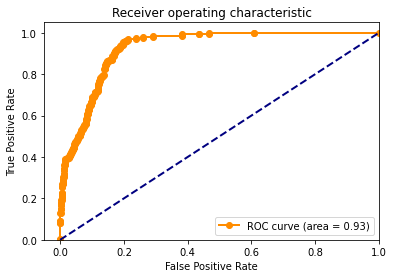

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()